In [1]:
# 1 Las siguientes preguntas respóndalas con sus propias palabras:
#
##(a) ¿Cuál es el rol de la función sigmoide en la regresión logística? ¿Por qué se utiliza esta función en lugar de una recta?

# El rol que cumple la fución sigmoide en la regresion logitica es que convierte la salida de la regresion lineal en una probabilidad entre 0 y 1  para poder facilitar su clasificación.

### (b) ¿Cómo manejan los SVM los problemas no lineales?

# Los SVM manejan los problemas no lineales mediante el uso de un kernel el cual transforma los datos de entrada a un espacio de mayor dimension con el proposito de que los datos sean linealmente separables.

###(c) Defina los conceptos de precisión y recall en el contexto de una tarea de clasificación binaria.

# En el contexto de una clasificación binaria la precisión es la cantidad de verdaderos positivos divididos por la cantidad de verdaderos positivos mas los falsos positivos, mientras que el recall es la cantidad de VP divididos por la cantidad de VP mas FN

### (d) Mencione un escenario en el que sería más importante priorizar la precisión sobre el recall, y otro escenario en el que sería mejor priorizar el recall. Explica por qué en cada caso.

# Un escenario en el que seria mas importante priorizar la precisión sobre el recall seria un sistema en el cual se detecte si un paciente tiene una enfermedad, ya que si se detecta que el paciente tiene una enfermedad cuando en realidad no la tiene, en este caso se le podrian hacer varias pruebas para poder confirmar si tiene la enfermedad o no,
#  mientras que si se detecta que el paciente no tiene la enfermedad cuando en realidad si la tiene, se podria poner en riesgo la vida del paciente.

In [2]:
# 2. La Base de datos se trata de una campaña de marketing de un banco. El objetivo es
# entrenar un modelo de clasificación binaria que prediga si un cliente aceptará o no un
# nuevo producto (Con el objetivo de contactar al cliente). Entrene un clasificador por
# regresión logística y uno con SVM.

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Cargar los datos
df = pd.read_csv("bank-additional-full.csv", sep=";")

# Preprocesar datos
# Convertir las variables categóricas a numéricas usando one-hot encoding
df = pd.get_dummies(df, drop_first=True)

# Separar las características (X) y la variable objetivo (y)
X = df.drop('y_yes', axis=1)  # Asumiendo que 'y_yes' es la columna objetivo después del encoding
y = df['y_yes']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Estandarizar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entrenar el modelo de Regresión Logística
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)
y_pred_log = log_reg.predict(X_test_scaled)

# Entrenar el modelo SVM
svm = SVC()
svm.fit(X_train_scaled, y_train)
y_pred_svm = svm.predict(X_test_scaled)

# Evaluar los modelos
print("Reporte de clasificación para Regresión Logística:")
print(classification_report(y_test, y_pred_log))

print("Reporte de clasificación para SVM:")
print(classification_report(y_test, y_pred_svm))



Reporte de clasificación para Regresión Logística:
              precision    recall  f1-score   support

       False       0.93      0.97      0.95     10968
        True       0.68      0.42      0.52      1389

    accuracy                           0.91     12357
   macro avg       0.80      0.70      0.74     12357
weighted avg       0.90      0.91      0.90     12357

Reporte de clasificación para SVM:
              precision    recall  f1-score   support

       False       0.92      0.98      0.95     10968
        True       0.67      0.37      0.48      1389

    accuracy                           0.91     12357
   macro avg       0.80      0.67      0.71     12357
weighted avg       0.90      0.91      0.90     12357



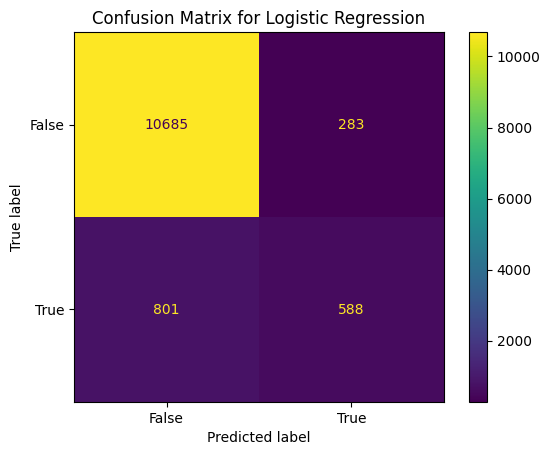

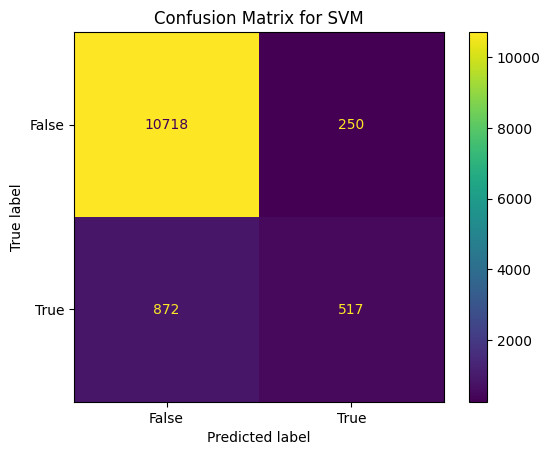

In [4]:
from sklearn.metrics import ConfusionMatrixDisplay

import matplotlib.pyplot as plt

# Graficar la matriz de confusión para el modelo de Regresión Logística
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_log)
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

# Graficar la matriz de confusión para el modelo SVM
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_svm)
plt.title('Confusion Matrix for SVM')
plt.show()


In [6]:
### Si estuviera trabajando para el banco, ¿qué sería más importante en este caso, precision
# o recall? Basándose en esta respuesta, elija el mejor modelo y justifique la razón.
# En este caso, sería más importante priorizar el recall sobre la precisión. 
# Esto se debe a que el objetivo de la campaña de marketing es contactar a los clientes que probablemente aceptarán el nuevo producto. 
# Si priorizamos el recall, minimizamos la cantidad de falsos negativos, es decir, reducimos la probabilidad de no contactar a un cliente que podría estar interesado en el producto.

# Basándonos en los reportes de clasificación, el modelo de Regresión Logística tiene un recall de 0.42 para la clase 'True', mientras que el modelo SVM tiene un recall de 0.37 para la misma clase.
# Por lo tanto, el modelo de Regresión Logística es el mejor modelo en este caso, ya que tiene un mayor recall para la clase de interés.